# Gráficas de entropía de tranferencia simbólica - experimentos de validación

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns
import os

### Opciones de graficación
Estética de las gráficas

In [2]:
sns.set_style("darkgrid")                          # Malla blanca
sns.set_context("paper", font_scale = 1.5)         # Tamaño de fuente en el contexto de un "paper"

## Archivos

In [3]:
ruta = "datos_entropia_conduccion/"
modelo = "fourier"
variable_x = "c"
variable_y = "d"
lista_archivos = [a for a in os.listdir(ruta) if a.endswith(modelo + ".csv")]
lista_xy = sorted([a for a in lista_archivos if a.startswith("ets_" + variable_x + variable_y)])
lista_yx = sorted([a for a in lista_archivos if a.startswith("ets_" + variable_y + variable_x)])

## Parámetros de construcción para las matrices de datos

In [4]:
nt = np.loadtxt(ruta + lista_xy[0]).shape[1] - 1  # Numero de pasos de retraso en el tiempo
nr = np.loadtxt(ruta + lista_xy[0]).shape[0]      # Numero de realizaciones de cada caso
t = np.linspace(1, nt, nt)                        # Tiempo

## Inicialización de las matrices de datos

In [5]:
matriz_xy_promedio = np.empty(nt)
matriz_yx_promedio = np.empty(nt)
matriz_xyyx_promedio = np.empty(nt)
matriz_yxxy_promedio = np.empty(nt)
                              
matriz_xy_error = np.empty(nt)
matriz_yx_error = np.empty(nt)
matriz_xyyx_error = np.empty(nt)
matriz_yxxy_error = np.empty(nt)

## Construcción de las matrices de datos

In [6]:
xy = np.loadtxt(ruta + lista_xy[0])[:, 1:]
yx = np.loadtxt(ruta + lista_yx[0])[:, 1:]
    
matriz_xy_promedio = xy.mean(axis = 0)
matriz_yx_promedio = yx.mean(axis = 0)
matriz_xyyx_promedio = (xy - yx).mean(axis = 0)
matriz_yxxy_promedio = (yx - xy).mean(axis = 0)
    
matriz_xy_error = xy.std(axis = 0, ddof = 1) / np.sqrt(nr)
matriz_yx_error = yx.std(axis = 0, ddof = 1) / np.sqrt(nr)
matriz_xyyx_error = (xy - yx).std(axis = 0, ddof = 1) / np.sqrt(nr)
matriz_yxxy_error = (yx - xy).std(axis = 0, ddof = 1) / np.sqrt(nr)

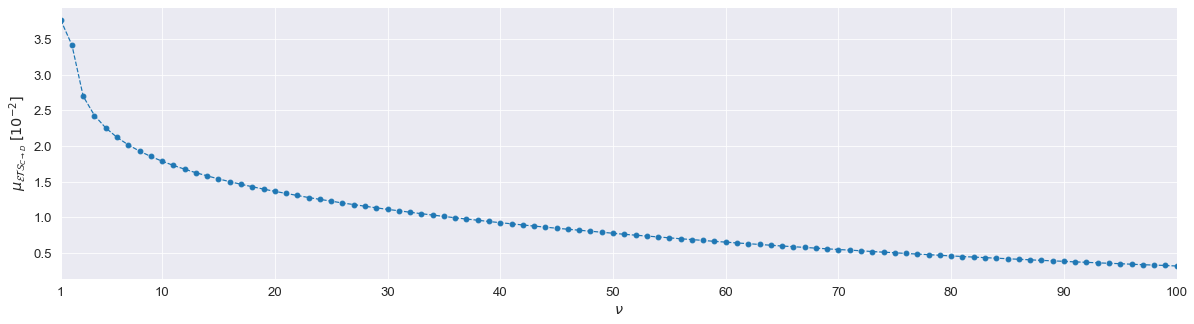

In [7]:
plt.figure(figsize  = (20, 5))
plt.xlabel("$\\nu$")
plt.ylabel("$\\mu_{\\mathcal{ETS}_{C \\rightarrow D}} \\; [10^{-2}]$")
plt.xlim(1, 100)
plt.xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.plot(t, matriz_xy_promedio * 100, "o--")
plt.fill_between(t, (matriz_xy_promedio - matriz_xy_error) * 100, (matriz_xy_promedio + matriz_xy_error) * 100, alpha = 0.2)
plt.savefig("grafica_conduccion/ets_" + variable_x + variable_y + "_" + modelo + ".pdf", bbox_inches = "tight")
plt.show()

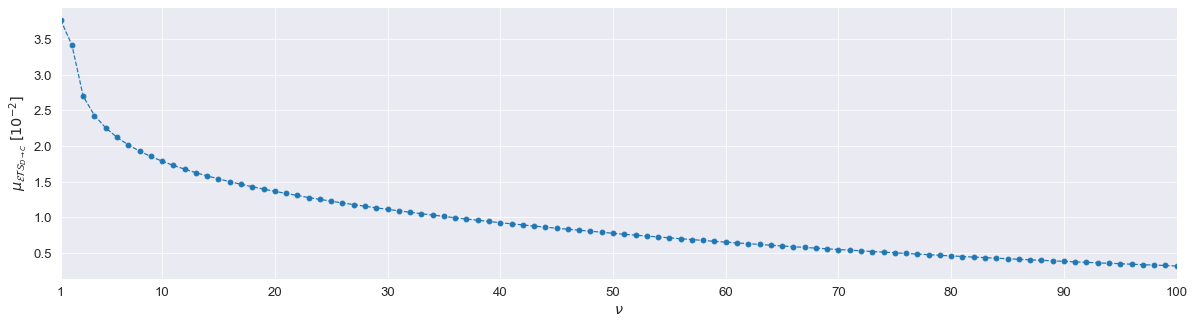

In [8]:
plt.figure(figsize  = (20, 5))
plt.xlabel("$\\nu$")
plt.ylabel("$\\mu_{\\mathcal{ETS}_{D \\rightarrow C}} \\; [10^{-2}]$")
plt.xlim(1, 100)
plt.xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.plot(t, matriz_yx_promedio * 100, "o--")
plt.fill_between(t, (matriz_yx_promedio - matriz_yx_error) * 100, (matriz_yx_promedio + matriz_yx_error) * 100, alpha = 0.2)
plt.savefig("grafica_conduccion/ets_" + variable_y + variable_x + "_" + modelo + ".pdf", bbox_inches = "tight")
plt.show()

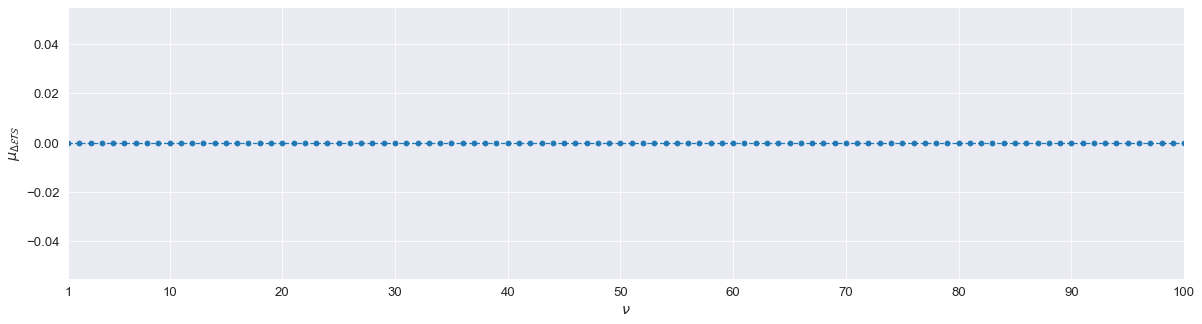

In [9]:
plt.figure(figsize  = (20, 5))
plt.xlabel("$\\nu$")
plt.ylabel("$\\mu_{\\Delta \\mathcal{ETS}}$")
plt.xlim(1, 100)
plt.xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.plot(t, matriz_xyyx_promedio, "o--")
plt.fill_between(t, 
                 (matriz_xyyx_promedio - matriz_xyyx_error),
                 (matriz_xyyx_promedio + matriz_xyyx_error), 
                 alpha = 0.2)
plt.savefig("grafica_conduccion/ets_" + variable_x + variable_y + variable_y + variable_x + "_" + modelo + ".pdf", bbox_inches = "tight")
plt.show()